In [7]:
import sys
print(sys.version)

3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 17:14:51) 
[GCC 7.2.0]


In [8]:
import tensorflow as tf
print(tf.__version__)

1.5.0


In [9]:
import dlib
import cv2
print(cv2.__version__)

4.2.0


In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
# from imutils import face_utils
os.getcwd()

'/home/lab02'

In [11]:
path = os.getcwd()+'/File'

In [12]:
mu = dlib.load_rgb_image(path+'/picom/roi11.jpg')
gi = dlib.load_rgb_image(path+'/picom/roi197.jpg')
# win = dlib.image_window()

In [13]:
mu1 = cv2.imread(path+'/picom/roi11.jpg')
gi1 = cv2.imread(path+'/picom/roi197.jpg')

In [59]:
shape_predict = path +'/shapepre/shape_predictor_68_face_landmarks.dat'
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(shape_predict)
mu1_gray = cv2.cvtColor(mu1, cv2.COLOR_BGR2GRAY)
gi1_gray = cv2.cvtColor(gi1, cv2.COLOR_BGR2GRAY)



In [60]:
exrects = detector(mu1_gray, 1)
exrects1 = detector(gi1_gray, 1)

In [61]:
exrects

rectangles[[(92, 93) (315, 316)]]

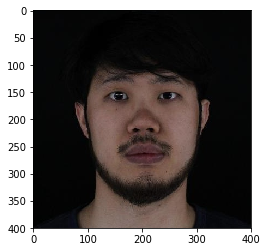

In [62]:
index = list(range(0, 68))

for face in exrects:

        shape = predictor(mu1, face) #얼굴에서 68개 점 찾기

        list_points = []
        for p in shape.parts():
            list_points.append([p.x, p.y])

        list_points = np.array(list_points)


#         for i,pt in enumerate(list_points[index]):

#             pt_pos = (pt[0], pt[1])
#             cv2.circle(mu1, pt_pos, 2, (0, 255, 0), -1)

        
#         cv2.rectangle(mu1, (face.left(), face.top()), (face.right(), face.bottom()),
#             (0, 0, 255), 3)

plt.imshow(cv2.cvtColor(mu1, cv2.COLOR_BGR2RGB))
plt.show()
# cv2.imshow('image', mu1)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

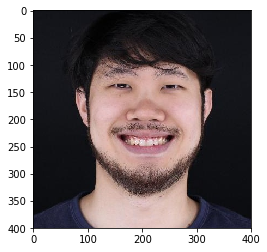

In [63]:
index = list(range(0, 68))

for face1 in exrects1:

        shape1 = predictor(gi1, face1) #얼굴에서 68개 점 찾기

        list_points = []
        for p in shape1.parts():
            list_points.append([p.x, p.y])

        list_points = np.array(list_points)


#         for i,pt in enumerate(list_points[index]):

#             pt_pos = (pt[0], pt[1])
#             cv2.circle(gi1, pt_pos, 2, (0, 255, 0), -1)

        
#         cv2.rectangle(gi1, (face1.left(), face1.top()), (face1.right(), face1.bottom()),
#             (0, 0, 255), 3)

plt.imshow(cv2.cvtColor(gi1, cv2.COLOR_BGR2RGB))
plt.show()
# cv2.imshow('image', mu1)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [64]:
print(type(exrects1))
print(type(face))

<class 'dlib.rectangles'>
<class 'dlib.rectangle'>


In [65]:
print(shape1.parts()[48])
print(shape1.parts()[54])

(150, 228)
(260, 231)


In [66]:
facedistance_x = []
facedistance_y = []

for i in range(0, len(shape.parts())):
    facedistance_x.append(abs(shape.parts()[i].x-shape1.parts()[i].x))
    facedistance_y.append(abs(shape.parts()[i].y-shape1.parts()[i].y))




In [67]:
facedistance_x
sorted_fdx = sorted(facedistance_x, reverse=True)

In [68]:
max(sorted_fdx)

16

In [69]:
len(sorted_fdx)

68

In [70]:
big = sorted_fdx[0:6]
print(big)
biglist = []

for i in big :
    biglist.append(facedistance_x.index(i))

biglist = list(set(biglist))
print(biglist)



[16, 15, 14, 14, 12, 10]
[48, 49, 54, 59, 60]


In [71]:
for i in biglist :
    print("{} 번째 점".format(i))    
    print(shape.parts()[i].x)
    print(shape1.parts()[i].x)
    print(shape.parts()[i].y)
    print(shape1.parts()[i].y)
    print("***")


48 번째 점
165
150
257
228
***
49 번째 점
178
168
242
217
***
54 번째 점
246
260
253
231
***
59 번째 점
179
167
272
251
***
60 번째 점
171
155
255
230
***


<BarContainer object of 68 artists>

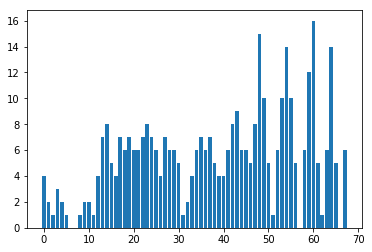

In [72]:
plt.bar(range(0, len(shape.parts())), facedistance_x)

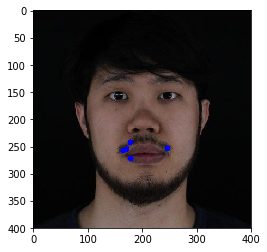

In [73]:
for i in biglist :
    cv2.circle(mu1, (shape.parts()[i].x, shape.parts()[i].y), 5, (255, 0, 0), -1)

plt.imshow(cv2.cvtColor(mu1, cv2.COLOR_BGR2RGB))
plt.show()

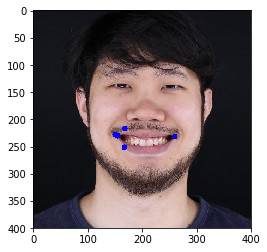

In [74]:
for i in biglist :
    cv2.circle(gi1, (shape1.parts()[i].x, shape1.parts()[i].y), 5, (255, 0, 0), -1)

plt.imshow(cv2.cvtColor(gi1, cv2.COLOR_BGR2RGB))
plt.show()

In [75]:
img = os.getcwd()+'/imagefile_test/test'
e01 = []
e02 = []
e03 = []

In [76]:
b=['', ' (2)', ' (3)', ' (4)']
for i in range(0,1001):
    for j in b:
#         try:
#             e01.append(cv2.imread(img+'/E01'+'/roi'+str(i)+j+'.jpg'))
# #             a = cv2.imread(img+'/E01'+'/roi'+str(i)+j+'.jpg'
#         except:
#             pass
        e01.append(cv2.imread(img+'/E01'+'/roi'+str(i)+j+'.jpg'))
      
    
e01 = list(filter(None.__ne__, e01))

for i in range(0,1001):
    for j in b:
#         try:
#             e01.append(cv2.imread(img+'/E01'+'/roi'+str(i)+j+'.jpg'))
# #             a = cv2.imread(img+'/E01'+'/roi'+str(i)+j+'.jpg'
#         except:
#             pass
        e02.append(cv2.imread(img+'/E02'+'/roi'+str(i)+j+'.jpg'))
      
    
e02 = list(filter(None.__ne__, e02))

for i in range(0,1001):
    for j in b:
#         try:
#             e01.append(cv2.imread(img+'/E01'+'/roi'+str(i)+j+'.jpg'))
# #             a = cv2.imread(img+'/E01'+'/roi'+str(i)+j+'.jpg'
#         except:
#             pass
        e03.append(cv2.imread(img+'/E03'+'/roi'+str(i)+j+'.jpg'))
      
    
e03 = list(filter(None.__ne__, e03))

57.78865309903437
4.627754831437959


<BarContainer object of 2877 artists>

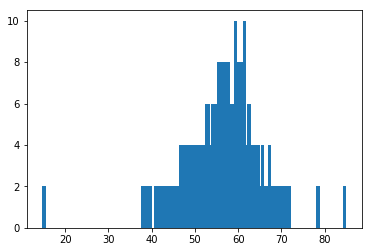

In [50]:
import math
from collections import Counter
bunpo=[]
center=[]
mouthleftd = []
mouthrightd = []
mouthmeand = []

for i in e01:
    e01_gray = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
    rects = detector(e01_gray, 1)
                        
    for face in rects:

        shape1 = predictor(i, face) #얼굴에서 68개 점 찾기

        list_points = []
        for p in shape1.parts():
            list_points.append([p.x, p.y])

        list_points = np.array(list_points)
        xmean = int(list_points.mean(axis=0)[0])
        ymean = int(list_points.mean(axis=0)[1])
        
        center.append((xmean, ymean))
        
        mouthleftd.append(math.sqrt((xmean-shape1.parts()[48].x) **2 + (ymean-shape1.parts()[48].y)**2))
        mld = math.sqrt((xmean-shape1.parts()[48].x) **2 + (ymean-shape1.parts()[48].y)**2)
        mouthrightd.append(math.sqrt((xmean-shape1.parts()[54].x) **2 + (ymean-shape1.parts()[54].y) **2))
        mrd = math.sqrt((xmean-shape1.parts()[54].x) **2 + (ymean-shape1.parts()[54].y)**2)
        
        mouthmeand.append((mld + mrd)/2)

mj = np.array(mouthmeand)
print(mj.mean())
print(mj.std())        
x = mouthmeand
result = Counter(x)
plt.bar(result.keys(), result.values())        

#         for i,pt in enumerate(list_points[index]):

#             pt_pos = (pt[0], pt[1])
#             cv2.circle(k, pt_pos, 2, (0, 255, 0), -1)

        
#         cv2.rectangle(k, (face.left(), face.top()), (face.right(), face.bottom()),
#             (0, 0, 255), 3)
                        

# plt.imshow(cv2.cvtColor(k, cv2.COLOR_BGR2RGB))
# plt.show()


57.528861188678945
4.737634168341353


<BarContainer object of 2877 artists>

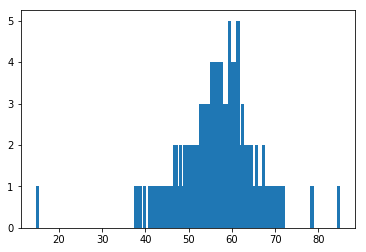

In [47]:
bunpo2=[]
center2=[]
mouthleftd2 = []
mouthrightd2 = []
mouthmeand2 = []

for i in e02:
    e02_gray = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
    rects2 = detector(e02_gray, 1)
                        
    for face2 in rects2:

        shape2 = predictor(i, face2) #얼굴에서 68개 점 찾기

        list_points2 = []
        for p in shape2.parts():
            list_points2.append([p.x, p.y])

        list_points2 = np.array(list_points2)
        xmean2 = int(list_points2.mean(axis=0)[0])
        ymean2 = int(list_points2.mean(axis=0)[1])
        
        center2.append((xmean2, ymean2))
        
        mouthleftd2.append(math.sqrt((xmean2-shape1.parts()[48].x) **2 + (ymean2-shape2.parts()[48].y)**2))
        mld2 = math.sqrt((xmean2-shape2.parts()[48].x) **2 + (ymean2-shape2.parts()[48].y)**2)
        mouthrightd2.append(math.sqrt((xmean2-shape2.parts()[54].x) **2 + (ymean2-shape2.parts()[54].y) **2))
        mrd2 = math.sqrt((xmean2-shape2.parts()[54].x) **2 + (ymean2-shape2.parts()[54].y)**2)
        
        mouthmeand2.append((mld2 + mrd2)/2)
        
mj = np.array(mouthmeand2)
print(mj.mean())
print(mj.std())

x2 = mouthmeand2
result2 = Counter(x)
plt.bar(result2.keys(), result2.values())

54.06850815097759
6.042598200047607


<BarContainer object of 2877 artists>

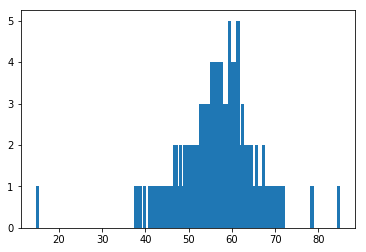

In [49]:
bunpo3=[]
center3=[]
mouthleftd3 = []
mouthrightd3 = []
mouthmeand3 = []

for i in e03:
    e03_gray = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
    rects3 = detector(e03_gray, 1)
                        
    for face3 in rects3:

        shape3 = predictor(i, face3) #얼굴에서 68개 점 찾기

        list_points3 = []
        for p in shape3.parts():
            list_points3.append([p.x, p.y])

        list_points3 = np.array(list_points3)
        xmean3 = int(list_points3.mean(axis=0)[0])
        ymean3 = int(list_points3.mean(axis=0)[1])
        
        center3.append((xmean3, ymean3))
        
        mouthleftd3.append(math.sqrt((xmean3-shape3.parts()[48].x) **2 + (ymean3-shape3.parts()[48].y)**2))
        mld3 = math.sqrt((xmean3-shape3.parts()[48].x) **2 + (ymean3-shape3.parts()[48].y)**2)
        mouthrightd3.append(math.sqrt((xmean3-shape3.parts()[54].x) **2 + (ymean3-shape3.parts()[54].y) **2))
        mrd3 = math.sqrt((xmean3-shape3.parts()[54].x) **2 + (ymean3-shape3.parts()[54].y)**2)
        
        mouthmeand3.append((mld3 + mrd3)/2)
        
mj = np.array(mouthmeand3)
print(mj.mean())
print(mj.std())

x3 = mouthmeand3
result3 = Counter(x)
plt.bar(result3.keys(), result3.values())

In [19]:
len(center)

3365

70.62726285433648
7.214882275634675
86.54525572702879
9.362430470741549
66.39898902291552
12.610353058262854


<BarContainer object of 574 artists>

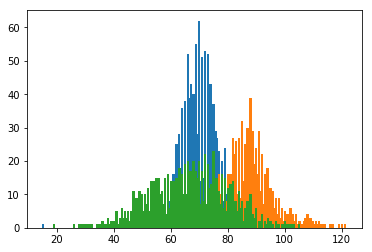

In [80]:
import math
from collections import Counter

mouthd_1 = []


for i in e01:
    e01_gray = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
    rects1 = detector(e01_gray, 1)
                        
    for face1 in rects1:

        shape1 = predictor(i, face1) #얼굴에서 68개 점 찾기

        list_points = []
        for p in shape1.parts():
            list_points.append([p.x, p.y])
        
        mouthd_1.append(math.sqrt((list_points[48][0]-list_points[54][0])**2 + (list_points[48][1]-list_points[54][1])**2))
        
    

mj = np.array(mouthd_1)
print(mj.mean())
print(mj.std())        
x = mouthd_1
result = Counter(x)
plt.bar(result.keys(), result.values()) 


mouthd_2 = []

for i in e02:
    e02_gray = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
    rects2 = detector(e02_gray, 1)
                        
    for face2 in rects2:

        shape2 = predictor(i, face2) #얼굴에서 68개 점 찾기

        list_points2 = []
        for p in shape2.parts():
            list_points2.append([p.x, p.y])
        
        mouthd_2.append(math.sqrt((list_points2[48][0]-list_points2[54][0])**2 + (list_points2[48][1]-list_points2[54][1])**2))
        
    

mj = np.array(mouthd_2)
print(mj.mean())
print(mj.std())        
x = mouthd_2
result2 = Counter(x)
plt.bar(result2.keys(), result2.values()) 



mouthd_3 = []

for i in e03:
    e03_gray = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
    rects3 = detector(e03_gray, 1)
                        
    for face3 in rects3:

        shape3 = predictor(i, face3) #얼굴에서 68개 점 찾기

        list_points3 = []
        for p in shape3.parts():
            list_points3.append([p.x, p.y])
        
        mouthd_3.append(math.sqrt((list_points3[48][0]-list_points3[54][0])**2 + (list_points3[48][1]-list_points3[54][1])**2))
        
    

mj = np.array(mouthd_3)
print(mj.mean())
print(mj.std())        
x = mouthd_3
result3 = Counter(x)
plt.bar(result3.keys(), result3.values()) 